In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
data = pd.read_csv(r"D:\Python\Regression\income.data.csv")
data.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [19]:
data.tail()

,Unnamed: 0,income,happiness
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664
497,498,4.530545,3.710193


In [20]:
data.shape

(498, 3)

In [21]:
data['income'].max()

7.48152138059959

In [22]:
data['happiness'].max()

6.86338795095807

In [23]:
data.columns

Index(['Unnamed: 0', 'income', 'happiness'], dtype='object')

In [24]:
data = data.drop(['Unnamed: 0'], axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
income,498.0,4.466902,1.737527,1.506275,3.006256,4.423710,5.991913,7.481521
happiness,498.0,3.392859,1.432813,0.266044,2.265864,3.472536,4.502621,6.863388


In [27]:
data.isnull().sum()

income       0
happiness    0
dtype: int64

In [28]:
data.duplicated().sum()

0

In [29]:
# Assuming you have a DataFrame named 'data' with columns 'income' and 'happiness'
X = data['income']
y = data['happiness']

In [30]:
# Add a constant term to the independent variable (income)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1483.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          3.96e-151
Time:                        16:50:21   Log-Likelihood:                -540.72
No. Observations:                 498   AIC:                             1085.
Df Residuals:                     496   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.089      2.299      0.0

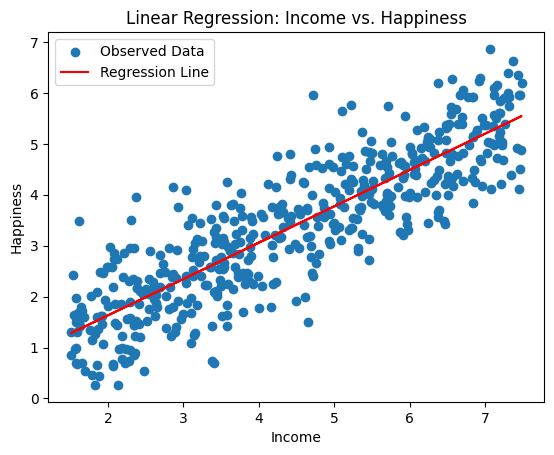

In [33]:
# Predicted values based on the model
y_pred = model.predict(X)

# Scatter plot of the data points
plt.scatter(data['income'], data['happiness'], label='Observed Data')

# Plot the regression line
plt.plot(data['income'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Linear Regression: Income vs. Happiness')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [34]:
income = int(input("Enter the income: "))
print(income)
new_data_point = [1,income]
pridicted_value = model.predict(new_data_point)
pridicted_value[0]

10


7.342525519006253

In [35]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.5901
Root Mean Squared Error (RMSE): 0.7682
Mean Absolute Error (MAE): 0.6270
R-squared (R²): 0.6663
